In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
%cd /content/drive/My\ Drive/summer21/new/src/data/fried

/content/drive/My Drive/summer21/new/src/data/fried


In [3]:
from sklearn.datasets import make_friedman1
import pandas as pd
import numpy as np

n_features=10

X, y = make_friedman1(n_samples=600, n_features=10)
data = pd.DataFrame(columns=['y'] + ['x'+str(x) for x in range(n_features)])
data['y'] = y
data[data.columns[1:]] = X
data

,y,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9
0,12.656052,0.389388,0.013667,0.880404,0.707957,0.503033,0.079636,0.319468,0.574883,0.516763,0.861610
1,23.629325,0.624629,0.280638,0.979409,0.881234,0.997492,0.717046,0.981862,0.000209,0.768163,0.461666
2,16.495523,0.652358,0.609742,0.439368,0.297004,0.792654,0.451845,0.415515,0.639643,0.868407,0.854118
3,24.282986,0.656933,0.682994,0.964559,0.612201,0.794871,0.785669,0.466337,0.726939,0.176721,0.730176
4,13.636231,0.438650,0.407201,0.036150,0.041896,0.718512,0.464189,0.646766,0.458949,0.825284,0.107229
...,...,...,...,...,...,...,...,...,...,...,...
595,7.859084,0.585647,0.013013,0.097279,0.279668,0.315865,0.902895,0.421222,0.874789,0.888796,0.152496
596,19.261193,0.529267,0.671202,0.400846,0.600939,0.814303,0.531831,0.466348,0.944870,0.127508,0.110381
597,14.824455,0.479028,0.297364,0.163565,0.748333,0.150034,0.062749,0.297972,0.403254,0.539614,0.364136
598,21.527937,0.727682,0.978842,0.025775,0.740003,0.354559,0.568180,0.253654,0.541023,0.089241,0.105196


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[data.columns] = scaler.fit_transform(data.values)

In [6]:
from sklearn.model_selection import train_test_split

train_test, validate = train_test_split(data, test_size=0.33)
train, test = train_test_split(train_test, test_size=0.5)

In [7]:
train.shape, test.shape, validate.shape

((201, 11), (201, 11), (198, 11))

In [9]:
from sklearn.neural_network import *
from sklearn.ensemble import *
from sklearn.neighbors import * 
from sklearn.svm import *

model = RandomForestRegressor(random_state=0)
model.fit(train.values[:,1:], train.values[:,0])
model.score(test.values[:,1:], test.values[:,0])

0.7474188192463108

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report

report = classification_report(model.predict(train.values[:,1:]), train.values[:,0], output_dict=True)
df = pd.DataFrame(report).transpose()
df

,precision,recall,f1-score,support
0,1.0,1.0,1.0,692.0
1,1.0,1.0,1.0,680.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,1372.0
weighted avg,1.0,1.0,1.0,1372.0


In [ ]:
important = np.array([sample for sample in test.values if BitArray(sample[1:s + 1]).uint in (0, 1, 4, 5)])
not_important = np.array([sample for sample in test.values if BitArray(sample[1:s + 1]).uint not in (0, 1, 4, 5)])

In [ ]:
model.score(important[:,1:], important[:,0])

0.9755395683453237

In [ ]:
model.score(not_important[:,1:], not_important[:,0])

0.7828655834564254

In [ ]:
model.predict([[0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1]])

array([1])

In [ ]:
from sklearn.inspection import permutation_importance

importance = permutation_importance(model, test.values[:,1:], test.values[:,0], n_repeats=1000).importances_mean

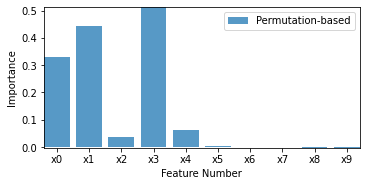

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 2.5))
ax.bar(data.columns[1:], importance, label='Permutation-based', alpha=0.75)
# ax.bar(data.columns[1:], model.feature_importances_, label='Impurity-based', alpha=0.75)
ax.legend(loc='upper right')
ax.autoscale(tight=True)
ax.set_xticklabels(data.columns[1:])

fig.tight_layout()

plt.xlabel('Feature Number'), plt.ylabel('Importance')
plt.show()

In [10]:
with open('fried_train.csv', 'w+') as f:
    f.write(train.to_csv())

In [11]:
with open('fried_test.csv', 'w+') as f:
    f.write(test.to_csv())

In [12]:
with open('fried_validate.csv', 'w+') as f:
    f.write(validate.to_csv())

In [ ]:
from sklearn.neural_network import *

model = MLPClassifier(random_state=0, max_iter=1000)
model.fit(data.drop(), )

NameError: ignored